In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
df = pd.read_csv("migration_population.csv")

In [51]:
df

,country,year,population,pop_density,net_migration,migration_perc,iso3c,iso2c,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,Arab World,2018,419790588.0,37.372365,NaN,NaN,ARB,1A,Aggregates,NaN,Aggregates,Aggregates,NaN,NaN,NaN
1,Arab World,2017,411898965.0,36.669804,-1408824.0,-0.003420,ARB,1A,Aggregates,NaN,Aggregates,Aggregates,NaN,NaN,NaN
2,Arab World,2016,404024433.0,35.968764,NaN,NaN,ARB,1A,Aggregates,NaN,Aggregates,Aggregates,NaN,NaN,NaN
3,Arab World,2015,396028278.0,35.256897,NaN,NaN,ARB,1A,Aggregates,NaN,Aggregates,Aggregates,NaN,NaN,NaN
4,Arab World,2014,387907748.0,34.533978,NaN,NaN,ARB,1A,Aggregates,NaN,Aggregates,Aggregates,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15571,Zimbabwe,1964,4322861.0,11.174515,NaN,NaN,ZWE,ZW,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312
15572,Zimbabwe,1963,4178726.0,10.801928,NaN,NaN,ZWE,ZW,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312
15573,Zimbabwe,1962,4039201.0,10.441259,-15009.0,-0.003716,ZWE,ZW,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312
15574,Zimbabwe,1961,3905034.0,10.094440,NaN,NaN,ZWE,ZW,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312


In [4]:
df.isna().sum()

country               0
year                  0
population          167
pop_density         746
net_migration     12708
migration_perc    12711
iso3c               118
iso2c               177
region              118
adminregion        7434
incomeLevel         118
lendingType         118
capitalCity        3127
longitude          3127
latitude           3127
dtype: int64

In [52]:
df2 = pd.DataFrame(df)

# Function to map unique numbers to non-NaN data
def encode_columns(df):
    encoded_df = df.copy()

    for column in df.columns:
        if df[column].dtype == 'object':  # Check if the column has object (string) dtype
            encoded_df[column], _ = pd.factorize(df[column])
        elif pd.api.types.is_numeric_dtype(df[column]):
            # If the column is numeric, no need to encode
            pass

    return encoded_df

encoded_df = encode_columns(df2)

print("Original DataFrame:")
print(df)

print("\nEncoded DataFrame:")

Original DataFrame:
          country  year   population  pop_density  net_migration  \
0      Arab World  2018  419790588.0    37.372365            NaN   
1      Arab World  2017  411898965.0    36.669804     -1408824.0   
2      Arab World  2016  404024433.0    35.968764            NaN   
3      Arab World  2015  396028278.0    35.256897            NaN   
4      Arab World  2014  387907748.0    34.533978            NaN   
...           ...   ...          ...          ...            ...   
15571    Zimbabwe  1964    4322861.0    11.174515            NaN   
15572    Zimbabwe  1963    4178726.0    10.801928            NaN   
15573    Zimbabwe  1962    4039201.0    10.441259       -15009.0   
15574    Zimbabwe  1961    3905034.0    10.094440            NaN   
15575    Zimbabwe  1960    3776681.0          NaN            NaN   

       migration_perc iso3c iso2c               region  \
0                 NaN   ARB    1A           Aggregates   
1           -0.003420   ARB    1A           Agg

In [53]:
encoded_df

,country,year,population,pop_density,net_migration,migration_perc,iso3c,iso2c,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,0,2018,419790588.0,37.372365,NaN,NaN,0,0,0,-1,0,0,-1,NaN,NaN
1,0,2017,411898965.0,36.669804,-1408824.0,-0.003420,0,0,0,-1,0,0,-1,NaN,NaN
2,0,2016,404024433.0,35.968764,NaN,NaN,0,0,0,-1,0,0,-1,NaN,NaN
3,0,2015,396028278.0,35.256897,NaN,NaN,0,0,0,-1,0,0,-1,NaN,NaN
4,0,2014,387907748.0,34.533978,NaN,NaN,0,0,0,-1,0,0,-1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15571,263,1964,4322861.0,11.174515,NaN,NaN,261,260,5,4,4,4,210,31.0672,-17.8312
15572,263,1963,4178726.0,10.801928,NaN,NaN,261,260,5,4,4,4,210,31.0672,-17.8312
15573,263,1962,4039201.0,10.441259,-15009.0,-0.003716,261,260,5,4,4,4,210,31.0672,-17.8312
15574,263,1961,3905034.0,10.094440,NaN,NaN,261,260,5,4,4,4,210,31.0672,-17.8312


국채 lendingType(대출유형) 예측모델 구성하기
1. 상관분석(대출유형에 영향 미치는 상관관계 파악)

1-1 결측치 제거

In [5]:
df["lendingType"].unique() # 대출유형 확인

array(['Aggregates', nan, 'IDA', 'IBRD', 'Not classified', 'Blend'],
      dtype=object)

Text(0, 0.5, '')

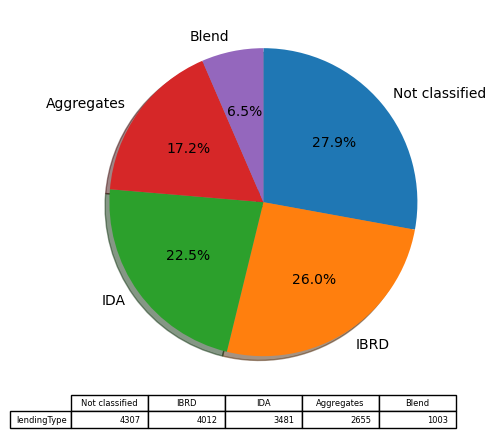

In [6]:
plot_pie = df["lendingType"].value_counts().plot.pie(figsize = (5,5), autopct='%0.1f%%', 
            startangle= 90, shadow= True, counterclock= False, table = True)
plot_pie.set_ylabel('')

In [7]:
df['incomeLevel'].unique() # 소득수준 확인

array(['Aggregates', nan, 'Low income', 'Upper middle income',
       'High income', 'Lower middle income'], dtype=object)

In [8]:
df.drop(df[(df['lendingType']=='Not classified')].index, inplace = True)

In [9]:
df.drop(df[(df['lendingType']=='Not classified') | (df['lendingType'].isna())].index, inplace = True) # 결측치, Not classified 제거
df.drop(df[df['incomeLevel'].isna()].index, inplace = True) # 추가적으로 소득수준 결측치 제거

In [10]:
df["lendingType"].value_counts(ascending= True) # 데이터의 불균형 확인

Blend         1003
Aggregates    2655
IDA           3481
IBRD          4012
Name: lendingType, dtype: int64

1-2. 수치형변수로 매핑: 상관관계 파악을 위해 등간척도로 변환필요

In [11]:
lendingTypeMapper = {
    'IDA': 0,
    'IBRD': 1,
    'Blend': 2,
    'Aggregates': 3

}

imcomeLevelMapper = { "Low income": 1,
                     "Lower middle income" : 2,
                     "Upper middle income" : 3,
                     "High income" : 4,
                     "Aggregates": 5
                    }


incomeLevelMap = lambda x: imcomeLevelMapper.get(x,x)
lendingTypeMap = lambda x: lendingTypeMapper.get(x,x)

df['incomeLevelRank'] = df['incomeLevel'].map(incomeLevelMap)
df['lendingTypeLevel'] = df['lendingType'].map(lendingTypeMap)

In [12]:
df

,country,year,population,pop_density,net_migration,migration_perc,iso3c,iso2c,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude,incomeLevelRank,lendingTypeLevel
0,Arab World,2018,419790588.0,37.372365,NaN,NaN,ARB,1A,Aggregates,NaN,Aggregates,Aggregates,NaN,NaN,NaN,5,3
1,Arab World,2017,411898965.0,36.669804,-1408824.0,-0.003420,ARB,1A,Aggregates,NaN,Aggregates,Aggregates,NaN,NaN,NaN,5,3
2,Arab World,2016,404024433.0,35.968764,NaN,NaN,ARB,1A,Aggregates,NaN,Aggregates,Aggregates,NaN,NaN,NaN,5,3
3,Arab World,2015,396028278.0,35.256897,NaN,NaN,ARB,1A,Aggregates,NaN,Aggregates,Aggregates,NaN,NaN,NaN,5,3
4,Arab World,2014,387907748.0,34.533978,NaN,NaN,ARB,1A,Aggregates,NaN,Aggregates,Aggregates,NaN,NaN,NaN,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15571,Zimbabwe,1964,4322861.0,11.174515,NaN,NaN,ZWE,ZW,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312,2,2
15572,Zimbabwe,1963,4178726.0,10.801928,NaN,NaN,ZWE,ZW,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312,2,2
15573,Zimbabwe,1962,4039201.0,10.441259,-15009.0,-0.003716,ZWE,ZW,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312,2,2
15574,Zimbabwe,1961,3905034.0,10.094440,NaN,NaN,ZWE,ZW,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,Blend,Harare,31.0672,-17.8312,2,2


1-3. 상관분석:  spearman 상관계수(서열척도 포함) 확인

In [55]:
encoded_df.corr(method = 'spearman')

,country,year,population,pop_density,net_migration,migration_perc,iso3c,iso2c,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
country,1.000000,0.000000,-0.373270,0.123560,0.187809,-0.051712,0.999267,0.988386,0.426604,0.285240,0.475076,0.431702,0.959643,0.163782,-0.047215
year,0.000000,1.000000,0.102193,0.215269,-0.034870,0.005898,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
population,-0.373270,0.102193,1.000000,-0.146738,-0.270778,0.133946,-0.373419,-0.365451,-0.481758,-0.138795,-0.445439,-0.491653,-0.350009,0.113910,0.123907
pop_density,0.123560,0.215269,-0.146738,1.000000,-0.012944,-0.064764,0.125010,0.140676,0.016332,-0.156219,0.172780,0.264863,0.072697,0.045527,0.188722
net_migration,0.187809,-0.034870,-0.270778,-0.012944,1.000000,0.707542,0.191136,0.189169,0.144182,-0.084558,0.247582,0.352055,0.169887,0.064261,0.095482
migration_perc,-0.051712,0.005898,0.133946,-0.064764,0.707542,1.000000,-0.050801,-0.048125,-0.165833,-0.299266,0.030469,0.151543,-0.077978,0.156186,0.172811
iso3c,0.999267,0.000000,-0.373419,0.125010,0.191136,-0.050801,1.000000,0.989139,0.427568,0.285240,0.476051,0.432679,0.959643,0.163782,-0.047215
iso2c,0.988386,0.000000,-0.365451,0.140676,0.189169,-0.048125,0.989139,1.000000,0.418752,0.274198,0.477691,0.430491,0.948705,0.163962,-0.030382
region,0.426604,0.000000,-0.481758,0.016332,0.144182,-0.165833,0.427568,0.418752,1.000000,0.620777,0.392389,0.378318,0.433800,-0.480210,-0.640675
adminregion,0.285240,0.000000,-0.138795,-0.156219,-0.084558,-0.299266,0.285240,0.274198,0.620777,1.000000,0.108626,-0.034885,0.307644,-0.194522,-0.558719


In [14]:
import scipy.stats as stats

rho, p_val = stats.spearmanr(df['lendingTypeLevel'],df['population'])
print("correlation coefficient : {}, p-value : {}".format(rho, p_val))
rho, p_val = stats.spearmanr(df['lendingTypeLevel'],df['incomeLevelRank'])
print("correlation coefficient : {}, p-value : {}".format(rho, p_val))

correlation coefficient : nan, p-value : nan
correlation coefficient : 0.8157401019646281, p-value : 0.0


<AxesSubplot:>

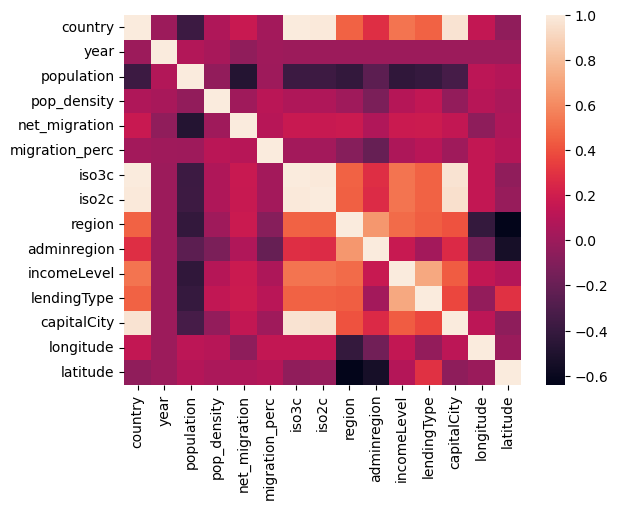

In [56]:
sns.heatmap(encoded_df.corr())

1-4 상관분석을 통해 대출유형에는 인구수와 소득유형이 가장 유의미한 변수 => 인구수에 대한 결측치 확인 및 제거

In [16]:
df.isna().sum()

country                0
year                   0
population            96
pop_density          490
net_migration       8985
migration_perc      8987
iso3c                  0
iso2c                 59
region                 0
adminregion         3245
incomeLevel            0
lendingType            0
capitalCity         2655
longitude           2655
latitude            2655
incomeLevelRank        0
lendingTypeLevel       0
dtype: int64

In [17]:
df.drop(df[df['population'].isna()].index, inplace = True) # 결측치 제거

In [18]:
df["lendingType"].value_counts(ascending= True) # 데이터의 불균형 확인

Blend         1003
Aggregates    2596
IDA           3474
IBRD          3982
Name: lendingType, dtype: int64

1-6 추가적으로 이민 비율이 대출유형에도 영향을 주는지 확인

In [19]:
new_df = df.copy()
new_df.drop(new_df[new_df['net_migration'].isna()].index, inplace = True) # 결측치 제거

In [20]:
new_df['lendingType'].value_counts(ascending=True) # 불균형 확인

Blend         192
Aggregates    528
IDA           670
IBRD          774
Name: lendingType, dtype: int64

In [21]:
new_df.isna().sum()

country               0
year                  0
population            0
pop_density          30
net_migration         0
migration_perc        0
iso3c                 0
iso2c                12
region                0
adminregion         624
incomeLevel           0
lendingType           0
capitalCity         528
longitude           528
latitude            528
incomeLevelRank       0
lendingTypeLevel      0
dtype: int64

In [22]:
new_df.corr(method = 'spearman')

,year,population,pop_density,net_migration,migration_perc,longitude,latitude,incomeLevelRank,lendingTypeLevel
year,1.000000,0.132177,0.269815,-0.092807,-0.034041,-0.001559,0.004124,0.002568,0.001579
population,0.132177,1.000000,0.051177,-0.356365,0.299306,0.156877,0.205235,0.459071,0.558025
pop_density,0.269815,0.051177,1.000000,-0.135879,-0.157606,0.080184,0.203310,-0.010422,-0.012156
net_migration,-0.092807,-0.356365,-0.135879,1.000000,0.588888,0.026199,-0.175358,-0.188125,-0.213364
migration_perc,-0.034041,0.299306,-0.157606,0.588888,1.000000,0.150801,0.008217,0.106763,0.157120
longitude,-0.001559,0.156877,0.080184,0.026199,0.150801,1.000000,0.135680,-0.210331,-0.051187
latitude,0.004124,0.205235,0.203310,-0.175358,0.008217,0.135680,1.000000,0.125861,0.153595
incomeLevelRank,0.002568,0.459071,-0.010422,-0.188125,0.106763,-0.210331,0.125861,1.000000,0.832822
lendingTypeLevel,0.001579,0.558025,-0.012156,-0.213364,0.157120,-0.051187,0.153595,0.832822,1.000000


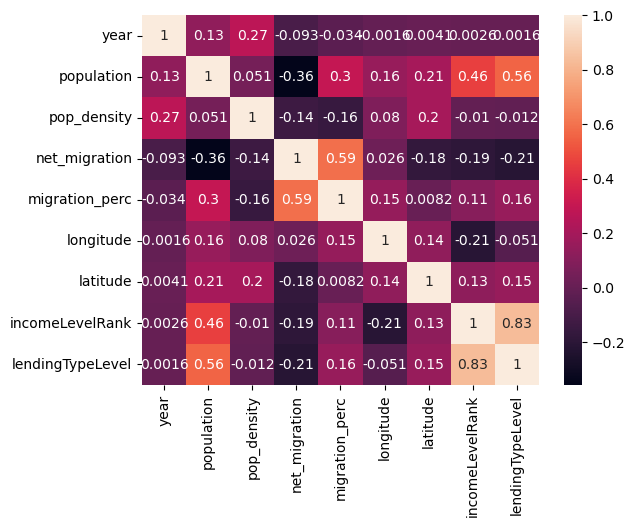

In [23]:
sns.heatmap(new_df.corr(method = 'spearman'), annot = True)
plt.savefig("spearman.png")

In [24]:
rho, p_val = stats.spearmanr(new_df['lendingTypeLevel'],new_df['net_migration'])
print("correlation coefficient : {}, p-value : {}".format(rho, p_val))

correlation coefficient : -0.21336429935214032, p-value : 1.0642630389359877e-23


1-7 상관관계 절대값이 0.2보다 큰 변수로 이루어진 데이터프레임 생성 => net_migration 상관계수 : -0.2

In [25]:
threshold_df1 = new_df[['population', 'net_migration', 'incomeLevelRank' , "lendingTypeLevel"]]
threshold_df1.reset_index(drop = True)

,population,net_migration,incomeLevelRank,lendingTypeLevel
0,411898965.0,-1408824.0,5,3
1,371443547.0,47229.0,5,3
2,330290716.0,3760036.0,5,3
3,294665185.0,183214.0,5,3
4,264822188.0,-1739489.0,5,3
...,...,...,...,...
2159,7958241.0,99068.0,2,2
2160,6712827.0,-152283.0,2,2
2161,5673911.0,-45547.0,2,2
2162,4779827.0,-42001.0,2,2


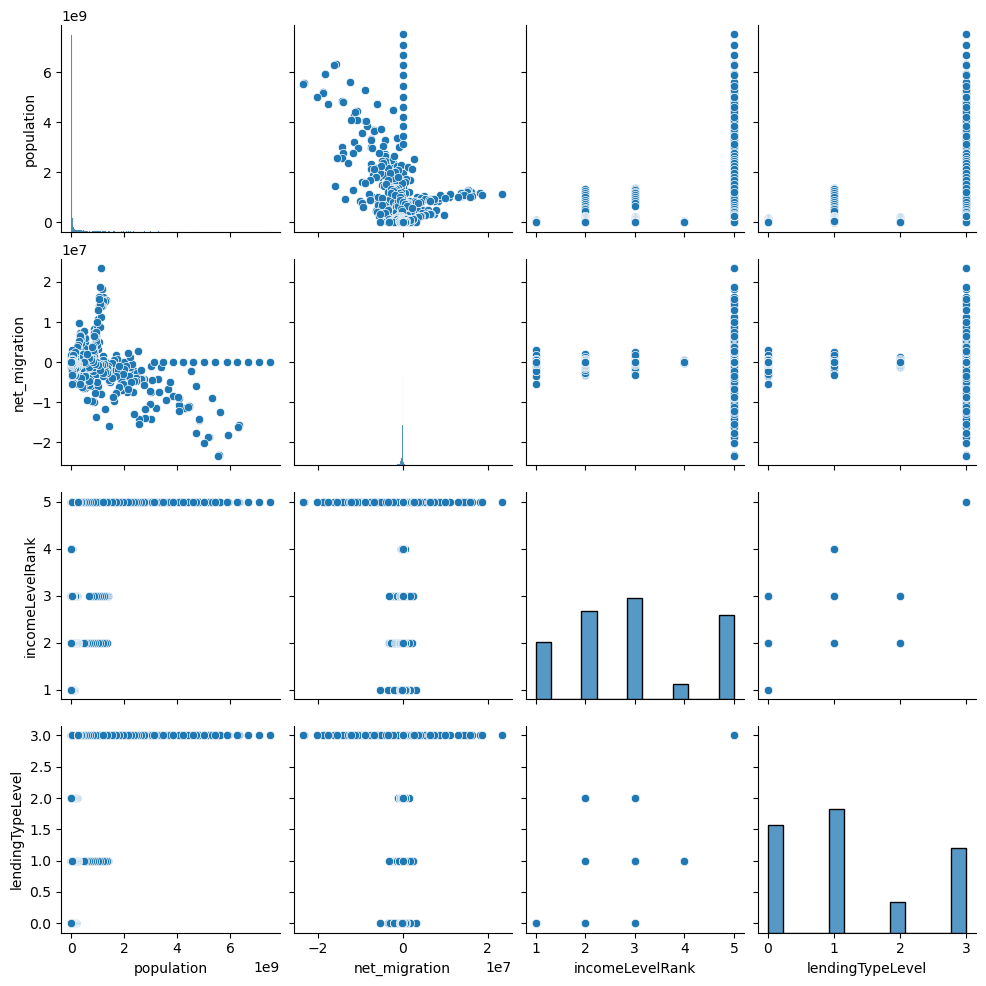

In [26]:
sns.pairplot(threshold_df1)

In [27]:
threshold_df1.reset_index(drop = True)

,population,net_migration,incomeLevelRank,lendingTypeLevel
0,411898965.0,-1408824.0,5,3
1,371443547.0,47229.0,5,3
2,330290716.0,3760036.0,5,3
3,294665185.0,183214.0,5,3
4,264822188.0,-1739489.0,5,3
...,...,...,...,...
2159,7958241.0,99068.0,2,2
2160,6712827.0,-152283.0,2,2
2161,5673911.0,-45547.0,2,2
2162,4779827.0,-42001.0,2,2


In [28]:
threshold_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164 entries, 1 to 15573
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   population        2164 non-null   float64
 1   net_migration     2164 non-null   float64
 2   incomeLevelRank   2164 non-null   int64  
 3   lendingTypeLevel  2164 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 149.1 KB


In [29]:
threshold_df1.describe()

,population,net_migration,incomeLevelRank,lendingTypeLevel
count,2.164000e+03,2.164000e+03,2164.000000,2164.000000
mean,2.927285e+08,-4.000393e+05,2.946396,1.267098
std,8.179518e+08,2.779179e+06,1.391105,1.141739
min,4.328100e+04,-2.334862e+07,1.000000,0.000000
25%,2.763692e+06,-2.806860e+05,2.000000,0.000000
50%,1.053140e+07,-3.667950e+04,3.000000,1.000000
75%,1.092334e+08,4.472500e+02,4.000000,2.000000
max,7.510990e+09,2.339235e+07,5.000000,3.000000


1-8 데이터 불균형 해결

Text(0, 0.5, '')

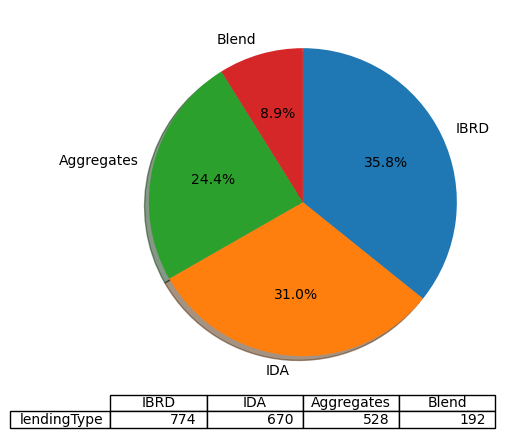

In [30]:
plot_pie = new_df['lendingType'].value_counts().plot.pie(figsize = (5,5), autopct='%0.1f%%', 
            startangle= 90, shadow= True, counterclock= False, table = True)
plot_pie.set_ylabel('')

In [31]:
from imblearn.under_sampling import RandomUnderSampler # 렌덤으로 언더 샘플링

y = threshold_df1["lendingTypeLevel"]

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(threshold_df1, y)

In [32]:
print('Removed Indexes:', rus.sample_indices_)

Removed Indexes: [1947 1030 1135 1730 1840 1565 1994  790 1985 1436 1914 1300  865 1974
 1147  872  882 1351 1290 1067 1284  627 1287 1341  917 1772  531 1933
 1178  867 2097 1128 1945 1462 1373 1336 2055 1765 1389  946 1384  919
 1282  870 1093  827 1131 1747 1806 1343 1347 1764  674 1075  671 1562
 1890 1940 1402 1978 1385  662 2096 1524 1760 2150 1039  746 1132 1995
  786 1372  936 2130 1316 1015 1522 1294 1066 1543 1169 1590 1984 1739
 2047 1844 1307 1344 1536  826 1748 1930 1794 1309 1577 1988 1563 1761
 1745 1151 1288 2100 1313 2137 1033 2103 1352 1175 1138 1813 1368 1405
 1803  756 1295  681  752 1383 1851 1143  815 1302 2051 1144 1377 1146
 1167 1540  916 1291  744  883 1037 1545 2139  664 1437 2092 1036 1413
  821  764 1334 1533 1337 1534 1349 1286 2132 1157 1726 1435  818  676
  876 1541 1593  921 1797 1564  745 2149 1172 1040  750 1561 1299  879
 1544 1031 1380 1756 1929  632 1810 1817  913  534 1751 1426 1346 1013
 2052  871 1381 1796 2143 1818  748 1410  810 1156  607  623

In [34]:
X_rus["lendingTypeLevel"].value_counts()

0    192
1    192
2    192
3    192
Name: lendingTypeLevel, dtype: int64

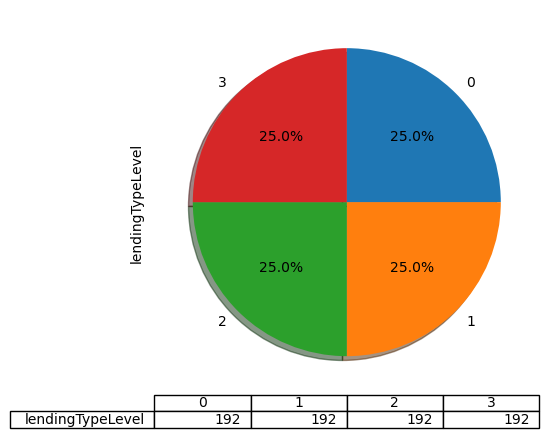

In [36]:
plot_pie = X_rus['lendingTypeLevel'].value_counts().plot.pie(figsize = (5,5), autopct='%0.1f%%', 
            startangle= 90, shadow= True, counterclock= False, table = True)

In [37]:
X_rus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 14098 to 2317
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   population        768 non-null    float64
 1   net_migration     768 non-null    float64
 2   incomeLevelRank   768 non-null    int64  
 3   lendingTypeLevel  768 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 30.0 KB


In [38]:
X_rus.reset_index(drop = True)

,population,net_migration,incomeLevelRank,lendingTypeLevel
0,1.065196e+07,25040.0,1,0
1,1.064000e+08,150002.0,1,0
2,4.290534e+06,-87571.0,1,0
3,6.419901e+06,1244966.0,1,0
4,1.091076e+07,-870998.0,1,0
...,...,...,...,...
763,4.593454e+09,0.0,5,3
764,4.679847e+08,-1202761.0,5,3
765,4.030488e+08,-3853301.0,5,3
766,5.303307e+06,-271073.0,5,3


In [ ]:
X_rus.to_csv("migration_population_balanced.csv", index = False) 

(array([103.,  41.,  19.,  10.,   3.,   2.,   4.,   4.,   4.,   2.]),
 array([1.33289400e+06, 6.68712646e+08, 1.33609240e+09, 2.00347215e+09,
        2.67085190e+09, 3.33823166e+09, 4.00561141e+09, 4.67299116e+09,
        5.34037091e+09, 6.00775067e+09, 6.67513042e+09]),
 <BarContainer object of 10 artists>)

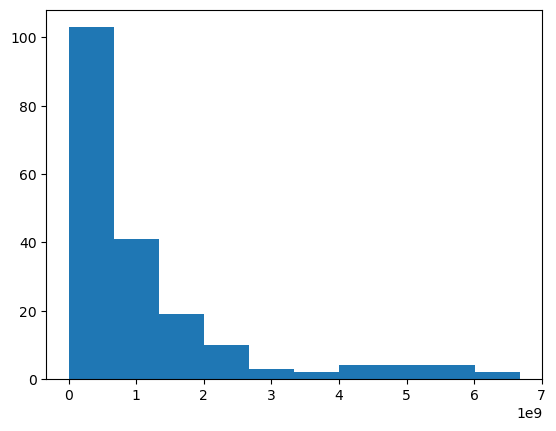

In [42]:
plt.hist(X_rus[X_rus['lendingTypeLevel']==3]['population'])